In [2]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import datetime
import glob
import os
import xlrd

In [3]:
TLC_Issue_progress = pd.read_excel(r'\\192.168.128.12\VTBN_Disk\% ДПС\03 - ТЛЦ\05 - ПИР\03 - ПРОЕКТ\20 BIM\997_Отчёты\Issues\Reports\Issue Report_TLC.xlsx', header = 0, sheet_name = 'Issues')         
TLC_Issue_progress['Created on'] = pd.to_datetime(TLC_Issue_progress['Created on']).dt.date
#TLC_Issue_progress['Updated on'] = pd.to_datetime(TLC_Issue_progress['Updated on']).dt.date
TLC_Issue_progress['Week'] = pd.to_datetime(TLC_Issue_progress['Created on']).dt.week
TLC_Issue_progress.insert(14,'Count', 1)
TLC_Issue_progress = TLC_Issue_progress.replace({'Status' : {'Open' : 'OPEN', 
                                        'Answered' : 'ANSWERED',
                                        'Open' : 'OPEN', 
                                        'Void' : 'VOID',
                                        'Draft' : 'DRAFT', 
                                        'Closed' : 'CLOSED'}})

TLC_Issue_progress

,ID,Title,Status,Type,Subtype,Description,Assigned to,Assignee type,Issue owner,Created on,...,Count,Root cause category,Company name,Response,Associated to document,Associated to checklist,Created by,Updated on,Updated by,Week
0,#1444,лист привести в соответствие с листом на котор...,OPEN,Координация,Координация,NaN,NaN,assigneeType.null,Roman pozdnyakov\nVTBR_UPTZ,2022-02-07,...,1,NaN,NaN,NaN,Yes,No,Roman pozdnyakov\nVTBR_UPTZ,2022-02-07 12:22:09,Roman pozdnyakov\nVTBR_UPTZ,6
1,#1443,Gp1 этап3,ANSWERED,Проектирование,Проектирование,NaN,МК3,Company,Алексей Голиков\nVTBR_UPTZ,2022-02-01,...,1,NaN,NaN,NaN,Yes,No,Алексей Голиков\nVTBR_UPTZ,2022-02-08 14:25:45,Veronica Leonova\nМК3,5
2,#1442,Внутренняя канализация,OPEN,Замечания к РД,Замечания к РД,Стояки канализации должны быть скрытыми,МК3,Company,Вадим Шеховцов\nVTBR_UPTZ,2022-01-31,...,1,NaN,NaN,NaN,Yes,No,Вадим Шеховцов\nVTBR_UPTZ,2022-01-31 11:49:35,Вадим Шеховцов\nVTBR_UPTZ,5
3,#1441,Внутренняя канализация,OPEN,Замечания к РД,Замечания к РД,Откорректировать положения стояка,МК3,Company,Вадим Шеховцов\nVTBR_UPTZ,2022-01-31,...,1,NaN,NaN,NaN,Yes,No,Вадим Шеховцов\nVTBR_UPTZ,2022-01-31 11:28:29,Вадим Шеховцов\nVTBR_UPTZ,5
4,#1440,Внутренняя канализация,OPEN,Замечания к РД,Замечания к РД,Стояки должны быть скрыты,МК3,Company,Вадим Шеховцов\nVTBR_UPTZ,2022-01-31,...,1,NaN,NaN,NaN,Yes,No,Вадим Шеховцов\nVTBR_UPTZ,2022-01-31 11:27:37,Вадим Шеховцов\nVTBR_UPTZ,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,#6,АБК металлобаза,CLOSED,Design,Design,NaN,МК3,Company,Алексей Голиков\nVTBR_UPTZ,2020-06-25,...,1,NaN,NaN,NaN,Yes,No,Алексей Голиков\nVTBR_UPTZ,2020-10-02 12:16:44,Алексей Голиков\nVTBR_UPTZ,26
1439,#5,АБК склада древесины,CLOSED,Design,Design,NaN,МК3,Company,Алексей Голиков\nVTBR_UPTZ,2020-06-25,...,1,NaN,NaN,NaN,Yes,No,Алексей Голиков\nVTBR_UPTZ,2020-10-02 12:19:42,Алексей Голиков\nVTBR_UPTZ,26
1440,#4,АБК склад цемента,CLOSED,Design,Design,NaN,МК3,Company,Алексей Голиков\nVTBR_UPTZ,2020-06-25,...,1,NaN,NaN,NaN,Yes,No,Алексей Голиков\nVTBR_UPTZ,2020-07-07 18:14:17,Алексей Голиков\nVTBR_UPTZ,26
1441,#3,планировки АБК тарноштучного склада,CLOSED,Design,Design,NaN,МК3,Company,Алексей Голиков\nVTBR_UPTZ,2020-06-25,...,1,NaN,NaN,NaN,Yes,No,Алексей Голиков\nVTBR_UPTZ,2020-07-07 18:13:22,Алексей Голиков\nVTBR_UPTZ,26


In [4]:
now = datetime.datetime.now()
ct = now.strftime("%Y-%m-%d")
TLC_Issue_progress.insert(15,'Current date', ct)
TLC_Issue_progress['Current date'] = pd.to_datetime(TLC_Issue_progress['Current date']).dt.date
#TLC_Issue_progress.insert(21,'Active days_mean', )
#for i in range(TLC_Issue_progress.Id.count()):
#    if (TLC_Issue_progress['Status'][i] == 'OPEN'):
#        TLC_Issue_progress['Active days_mean'][i] = TLC_Issue_progress['Current date'][i] - TLC_Issue_progress['Created on'][i]
#    elif (TLC_Issue_progress['Status'][i] == 'ANSWERED'):
#        TLC_Issue_progress['Active days_mean'][i] = TLC_Issue_progress['Current date'][i] - TLC_Issue_progress['Created on'][i]
#    elif (TLC_Issue_progress['Status'][i] == 'CLOSED'):
#        TLC_Issue_progress['Active days_mean'][i] = TLC_Issue_progress['Updated on'][i] - TLC_Issue_progress['Created on'][i]
#    elif (TLC_Issue_progress['Status'][i] == 'DRAFT'):
#        TLC_Issue_progress['Active days_mean'][i] = 0

TLC_Issue_progress['Total days'] = TLC_Issue_progress['Current date'] - TLC_Issue_progress['Created on'] 
#TLC_Issue_progress['Active days'] = TLC_Issue_progress['Updated on'] - TLC_Issue_progress['Created on'] 

#TLC_Issue_progress['Active days'] = TLC_Issue_progress['Active days'].dt.days
TLC_Issue_progress['Total days'] = TLC_Issue_progress['Total days'].dt.days

TLC_Issue_progress_active = TLC_Issue_progress.query("Status == ['OPEN','ANSWERED']")
TLC_Issue_progress_active_gr = TLC_Issue_progress_active.groupby(['Location', 'Status', 'Current date']).aggregate({'Count': 'sum', 'Total days': 'mean'})
TLC_Issue_progress_active_gr_sort = TLC_Issue_progress_active_gr.sort_values(by=['Total days'], ascending=False)
TLC_Issue_progress_active_gr_sort

TLC_Issue_progress_all = TLC_Issue_progress.groupby(['Status', 'Current date']).aggregate({'Count': 'count',
                                                 })
now = datetime.datetime.now()
ct = now.strftime("%Y_%m_%d")
with pd.ExcelWriter(r'\\192.168.128.12\VTBN_Disk\% ДПС\03 - ТЛЦ\05 - ПИР\03 - ПРОЕКТ\20 BIM\997_Отчёты\Issues\Progress\TLC_Issue_progress_' + ct + '.xlsx') as writer:  
    TLC_Issue_progress_all.to_excel(writer, sheet_name='All Issues')    
#    TLC_Issue_progress_active_gr_sort.to_excel(writer, sheet_name='Issies by Buildings')
TLC_Issue_progress_all

#Извлечение даты из имени файлов
files = os.listdir(r'\\192.168.128.12\VTBN_Disk\% ДПС\03 - ТЛЦ\05 - ПИР\03 - ПРОЕКТ\20 BIM\997_Отчёты\Issues\Progress')

ln = len(files)

for i in range(ln):
    files[i] = files[i].split('_')
    del files[i][:3]

for i in range(ln):
    files[i][2] = files[i][2].split('.')
    del files[i][2][-1]  
    files[i][2] = ''.join(files[i][2])
    files[i] = '.'.join(files[i])
files

#Создание списка адресов
names = glob.glob(r'\\192.168.128.12\VTBN_Disk\% ДПС\03 - ТЛЦ\05 - ПИР\03 - ПРОЕКТ\20 BIM\997_Отчёты\Issues\Progress\*.xlsx', recursive=True)
cont = []


#Схлопывание всех данных Total
for i in range(len(names)):
    # считать один датафрейм, добавить ему поле и сохранить
    TLC_Issue_Total_Progress = pd.read_excel(names[i], sheet_name = 'All Issues')
    cont.append(TLC_Issue_Total_Progress)
TLC_Issue_Total_Progress
TLC_Issue_Total_Progress = pd.concat(cont)
pd.to_datetime(TLC_Issue_Total_Progress['Current date'])
TLC_Issue_Progress_Pivot = TLC_Issue_Total_Progress.pivot_table(values = 'Count', index = 'Status', columns = 'Current date', aggfunc = 'sum')
TLC_Issue_Progress_Pivot

TLC_Issue_progress.rename(columns = {"Total days" : "Total_days"}, inplace=True)
TLC_Issue_progress.rename(columns = {"Active days" : "Active_days"}, inplace=True)
TLC_Issue_progress.query("Total_days < 7")


#TLC_Issue_last_upd = TLC_Issue_progress.query("Active_days < 7")
TLC_Issue_last_crt = TLC_Issue_progress.query("Total_days < 7")
TLC_Issue_last_crt_gr = TLC_Issue_last_crt.groupby(['Status', 'Current date']).aggregate({'Count': 'sum'})
#TLC_Issue_last_upd_gr = TLC_Issue_last_upd.groupby(['Status', 'Current date']).aggregate({'Count': 'sum'})
#TLC_Issue_last_upd_gr
TLC_Issue_last_crt_gr

with pd.ExcelWriter(r'\\192.168.128.12\VTBN_Disk\% ДПС\03 - ТЛЦ\05 - ПИР\03 - ПРОЕКТ\20 BIM\997_Отчёты\TLC_Issue_progress_total_' + ct + '.xlsx') as writer:  
    TLC_Issue_Progress_Pivot.to_excel(writer, sheet_name='Issues by Dates')
#    TLC_Issue_last_crt_gr.to_excel(writer, sheet_name='Weekly Issue Created')
#    TLC_Issue_last_upd_gr.to_excel(writer, sheet_name='Weekly Issue Updated')
#    TLC_Issue_progress_active_gr_sort.to_excel(writer, sheet_name='Issies by Buildings')
    TLC_Issue_progress.to_excel(writer, sheet_name='All Issues')
    
TLC_Issue_Progress_Pivot

Current date,2020-09-30,2020-10-06,2020-10-08,2020-10-13,2020-10-21,2020-10-28,2020-11-05,2020-11-11,2020-11-18,2020-11-25,...,2021-12-01,2021-12-08,2021-12-14,2021-12-21,2022-01-11,2022-01-18,2022-01-25,2022-01-26,2022-02-01,2022-02-08
Status,,,,,,,,,,,,,,,,,,,,,
ANSWERED,5.0,26.0,26.0,23.0,11.0,18.0,17.0,9.0,13.0,17.0,...,46.0,36.0,54.0,40.0,30.0,26.0,78.0,78.0,68.0,43.0
CLOSED,17.0,27.0,27.0,28.0,51.0,54.0,59.0,80.0,98.0,111.0,...,837.0,869.0,878.0,906.0,941.0,958.0,1008.0,1008.0,1032.0,1060.0
DRAFT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
OPEN,37.0,34.0,34.0,48.0,60.0,71.0,82.0,81.0,63.0,49.0,...,386.0,386.0,385.0,383.0,379.0,402.0,322.0,322.0,319.0,317.0
VOID,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


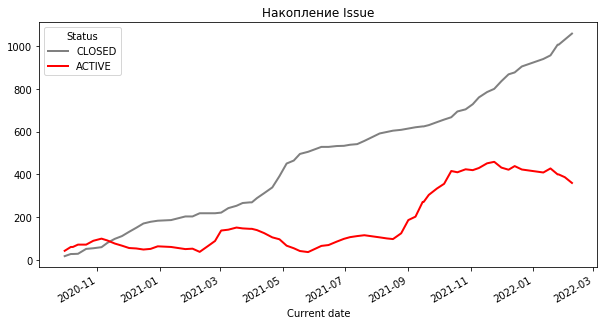

In [5]:
TLC_Issue_Progress_plot = TLC_Issue_Total_Progress.pivot_table(values = 'Count', index = 'Current date', columns = 'Status', aggfunc = 'sum')
TLC_Issue_Progress_Pivot

my_color = ['gray', 'red']
#my_linewidth = ['1', '2']
#my_linestyle = ['-', '--']
TLC_Issue_Progress_plot['ACTIVE'] = TLC_Issue_Progress_plot['OPEN'] + TLC_Issue_Progress_plot['ANSWERED']
TLC_Issue_Progress_plot = TLC_Issue_Progress_plot.drop(['DRAFT','VOID','ANSWERED','OPEN'],axis=1)
TLC_Issue_Progress_plot.plot(kind = 'line', figsize = [10, 5], title = 'Накопление Issue', color = my_color, linewidth = 2)


In [33]:
ORC_Issue_progress = pd.read_excel(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03 - ПД\20_BIM\997_Отчёты\Issues\Reports\Issue Report_ORC.xlsx', header = 0, sheet_name = 'Issues')         
#ORC_Issue_progress.rename(columns = {"Start date" : "Created_on",
#                                     "Updated on" : "Updated_on"
#                                    }, inplace=True)

ORC_Issue_progress = ORC_Issue_progress.replace({'Status' : {'Open' : 'OPEN', 
                                        'Answered' : 'ANSWERED',
                                        'Open' : 'OPEN', 
                                        'Void' : 'VOID',
                                        'Draft' : 'DRAFT', 
                                        'Closed' : 'CLOSED'}})
ORC_Issue_progress

,ID,Title,Status,Type,Subtype,Description,Assigned to,Assignee type,Issue owner,Created on,...,Location details,Root cause,Root cause category,Company name,Response,Associated to document,Associated to checklist,Created by,Updated on,Updated by
0,#1518,На кровле не отображено вент оборудование и мо...,OPEN,Координация,Координация,NaN,Svetlana Dubovitskaya\nSpectrum,User,Sergey Tsarev\nVTBR_UPTZ,2021-11-19 14:35:58,...,NaN,NaN,NaN,Spectrum,NaN,Yes,No,Sergey Tsarev\nVTBR_UPTZ,2021-11-19 14:35:58,Sergey Tsarev\nVTBR_UPTZ
1,#1517,Оборудование перекрывает дверной проем,OPEN,Координация,Координация,NaN,Victor Zelenin\nSpectrum,User,Владимир Гаськов\nVTBR_UPTZ,2021-11-19 14:33:31,...,NaN,NaN,NaN,Spectrum,NaN,Yes,No,Sergey Tsarev\nVTBR_UPTZ,2021-11-22 10:19:50,Roman Shatilov\nSpectrum
2,#1516,Отсутствуют элементы системы дождевой канализации,OPEN,Координация,Координация,NaN,Ирина Короткова\nSpectrum,User,Sergey Tsarev\nVTBR_UPTZ,2021-11-11 09:29:53,...,NaN,NaN,NaN,Spectrum,NaN,Yes,No,Sergey Tsarev\nVTBR_UPTZ,2021-11-16 18:50:30,Roman Shatilov\nSpectrum
3,#1515,В с/у отсутствует перегородка,CLOSED,Координация,Координация,NaN,Sergey Tsarev\nVTBR_UPTZ,User,Sergey Tsarev\nVTBR_UPTZ,2021-11-02 17:46:39,...,NaN,NaN,NaN,VTBR_UPTZ,NaN,Yes,No,Sergey Tsarev\nVTBR_UPTZ,2021-11-26 10:38:38,Sergey Tsarev\nVTBR_UPTZ
4,#1514,Прибор отопления размещен в стене,CLOSED,Координация,Координация,NaN,Sergey Tsarev\nVTBR_UPTZ,User,Sergey Tsarev\nVTBR_UPTZ,2021-11-02 17:43:26,...,NaN,NaN,NaN,VTBR_UPTZ,NaN,Yes,No,Sergey Tsarev\nVTBR_UPTZ,2021-11-17 10:47:51,Sergey Tsarev\nVTBR_UPTZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,#5,Нечитаемый шрифт,CLOSED,Проектирование,Требования к BIM модели,Нечитаемый шрифт,Dmitrii Reshetnyakov\nSpectrum,User,Andrey Kumskov\nVTBR_UPTZ,2020-08-24 13:27:06,...,NaN,NaN,NaN,Spectrum,Принято,Yes,No,Andrey Kumskov\nVTBR_UPTZ,2020-09-30 15:46:35,Andrey Kumskov\nVTBR_UPTZ
1513,#4,Нечитаемый шрифт,CLOSED,Проектирование,Требования к оформлению,Нечитаемый шрифт,Dmitrii Reshetnyakov\nSpectrum,User,Andrey Kumskov\nVTBR_UPTZ,2020-08-24 13:26:12,...,NaN,NaN,NaN,Spectrum,NaN,Yes,No,Andrey Kumskov\nVTBR_UPTZ,2020-09-30 15:46:41,Andrey Kumskov\nVTBR_UPTZ
1514,#3,Наименование BIM моделей,CLOSED,Проектирование,Требования к BIM модели,"Переименовать модели: сейчас стадия везде 1, д...",Dmitrii Reshetnyakov\nSpectrum,User,Andrey Kumskov\nVTBR_UPTZ,2020-08-24 13:23:48,...,Требования относится ко всем моделям,NaN,NaN,Spectrum,NaN,No,No,Andrey Kumskov\nVTBR_UPTZ,2020-09-15 13:16:14,Andrey Kumskov\nVTBR_UPTZ
1515,#2,Комментарии к планировкам,VOID,Проектирование,Проектирование,NaN,VTBR_PPK-KOSINO,Company,Митрофанов Дмитрий\nVTBR_UPTZ,2020-08-21 15:00:50,...,NaN,Неверное задание,Проектирование,NaN,NaN,Yes,No,Митрофанов Дмитрий\nVTBR_UPTZ,2020-10-01 12:00:37,Митрофанов Дмитрий\nVTBR_UPTZ


In [34]:
ORC_Issue_progress['Created_on'] = pd.to_datetime(ORC_Issue_progress['Created on']).dt.date
ORC_Issue_progress['Created_on'] = pd.to_datetime(ORC_Issue_progress['Created on'], errors='ignore')

#ORC_Issue_progress['Updated_on'] = pd.to_datetime(ORC_Issue_progress['Updated_on']).dt.date
#ORC_Issue_progress['Updated_on'] = pd.to_datetime(ORC_Issue_progress['Updated_on'], errors='ignore')
ORC_Issue_progress['Week'] = pd.to_datetime(ORC_Issue_progress['Created_on']).dt.week
ORC_Issue_progress.insert(14,'Count', 1)

now = datetime.datetime.now()
ct = now.strftime("%Y-%m-%d")
ORC_Issue_progress.insert(15,'Current date', ct)
ORC_Issue_progress['Current date'] = pd.to_datetime(ORC_Issue_progress['Current date']).dt.date
ORC_Issue_progress['Current date'] = pd.to_datetime(ORC_Issue_progress['Current date'])

ORC_Issue_progress['Total days'] = ORC_Issue_progress['Current date'] - ORC_Issue_progress['Created_on'] 
#ORC_Issue_progress['Active days'] = ORC_Issue_progress['Updated_on'] - ORC_Issue_progress['Created_on'] 

#ORC_Issue_progress['Active days'] = ORC_Issue_progress['Active days'].dt.days
ORC_Issue_progress['Total days'] = ORC_Issue_progress['Total days'].dt.days

ORC_Issue_progress_active = ORC_Issue_progress.query("Status == ['OPEN','ANSWERED']")
ORC_Issue_progress_active_gr = ORC_Issue_progress_active.groupby(['Status', 'Current date']).aggregate({'Count': 'sum', 'Total days': 'mean'})
ORC_Issue_progress_active_gr_sort = ORC_Issue_progress_active_gr.sort_values(by=['Total days'], ascending=False)
ORC_Issue_progress_active_gr_sort

ORC_Issue_progress_all = ORC_Issue_progress.groupby(['Status', 'Current date']).aggregate({'Count': 'sum',
                                                 })
now = datetime.datetime.now()
ct = now.strftime("%Y_%m_%d")
with pd.ExcelWriter(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03 - ПД\20_BIM\997_Отчёты\Issues\Progress\ORC_Issue_progress_' + ct + '.xlsx') as writer:  
    ORC_Issue_progress_all.to_excel(writer, sheet_name='All Issues')    
#    ORC_Issue_progress_active_gr_sort.to_excel(writer, sheet_name='Issies by Buildings')
    

    #Извлечение даты из имени файлов
files = os.listdir(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03 - ПД\20_BIM\997_Отчёты\Issues\Progress')

ln = len(files)

for i in range(ln):
    files[i] = files[i].split('_')
    del files[i][:3]

for i in range(ln):
    files[i][2] = files[i][2].split('.')
    del files[i][2][-1]  
    files[i][2] = ''.join(files[i][2])
    files[i] = '.'.join(files[i])
files

#Создание списка адресов
names = glob.glob(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03 - ПД\20_BIM\997_Отчёты\Issues\Progress\*.xlsx', recursive=True)
cont = []

#Схлопывание всех данных Total
for i in range(len(names)):
    # считать один датафрейм, добавить ему поле и сохранить
    ORC_Issue_Total_Progress = pd.read_excel(names[i], sheet_name = 'All Issues')
    cont.append(ORC_Issue_Total_Progress)
ORC_Issue_Total_Progress
ORC_Issue_Total_Progress = pd.concat(cont)
pd.to_datetime(ORC_Issue_Total_Progress['Current date'])
ORC_Issue_Progress_Pivot = ORC_Issue_Total_Progress.pivot_table(values = 'Count', index = 'Status', columns = 'Current date', aggfunc = 'sum')

ORC_Issue_progress.rename(columns = {"Total days" : "Total_days"}, inplace=True)
#ORC_Issue_progress.rename(columns = {"Active days" : "Active_days"}, inplace=True)
#ORC_Issue_progress.query("'2021-02-10' <= 'Updated_on' <= '2021-02-17'")

In [35]:
#ORC_Issue_last_upd = ORC_Issue_progress.query("Active_days < 7")
ORC_Issue_last_crt = ORC_Issue_progress.query("Total_days < 7")
ORC_Issue_last_crt_gr = ORC_Issue_last_crt.groupby(['Status', 'Current date']).aggregate({'Count': 'sum'})
#ORC_Issue_last_upd_gr = ORC_Issue_last_upd.groupby(['Status', 'Current date']).aggregate({'Count': 'sum'})

#Подключение документов к Issues
#ORC_Issue_docs = pd.read_excel(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03_ПД\20_BIM\997_Отчёты\Issues\Issues_docs.xlsx', header = 0, sheet_name = 'Issue_Cl')  
#ORC_Issue_docs.columns=['index','discipline','File','Id']
#ORC_Issue_docs = ORC_Issue_docs.drop('index', axis = 1)
#ORC_Issue_progress = ORC_Issue_progress.merge(ORC_Issue_docs, on = 'Id', how = 'inner')

#ORC_Issue_progress_active_discgr = ORC_Issue_progress.groupby(['Status', 'Location', 'discipline']).aggregate({'Count': 'count'})

with pd.ExcelWriter(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03 - ПД\20_BIM\997_Отчёты\ORC_Issue_progress_total_' + ct + '.xlsx') as writer:  
    ORC_Issue_Progress_Pivot.to_excel(writer, sheet_name='Issues by Dates')
    ORC_Issue_last_crt_gr.to_excel(writer, sheet_name='Weekly Issue Created')
#    ORC_Issue_last_upd_gr.to_excel(writer, sheet_name='Weekly Issue Updated')
#    ORC_Issue_progress_active_gr_sort.to_excel(writer, sheet_name='Issies by Buildings')
    ORC_Issue_progress.to_excel(writer, sheet_name='All Issues') 
    
#with pd.ExcelWriter(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03_ПД\20_BIM\997_Отчёты\Issues\ORC_Issue_progress_group_' + ct + '.xlsx') as writer:  
#    ORC_Issue_progress_active_discgr.to_excel(writer, sheet_name='Issues_build_disc')
    
#ORC_Issue_progress.Total_days.max()


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
ORC_Issue_Progress_plot = ORC_Issue_Total_Progress.pivot_table(values = 'Count', index = 'Current date', columns = 'Status', aggfunc = 'sum')

ORC_Issue_Progress_plot = ORC_Issue_Progress_plot.reset_index()
my_color = ['gray', 'red']
#my_linewidth = ['1', '2']
#my_linestyle = ['-', '--']
ORC_Issue_Progress_plot['ACTIVE'] = ORC_Issue_Progress_plot['OPEN'] + ORC_Issue_Progress_plot['ANSWERED']
ORC_Issue_Progress_plot.rename(columns = {"Current date" : "Current_date"}, inplace=True) 
ORC_Issue_Progress_plot = ORC_Issue_Progress_plot.query("'2021-01-01' <= Current_date <= '2021-06-24'")
ORC_Issue_Progress_plot = ORC_Issue_Progress_plot.drop(['VOID','ANSWERED','OPEN'],axis=1)
ORC_Issue_Progress_plot


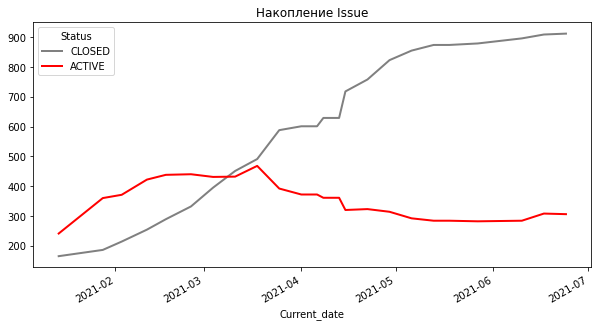

In [36]:
ORC_Issue_Progress_plot.plot(kind = 'line', x = 'Current_date', figsize = [10, 5], title = 'Накопление Issue', color = my_color, linewidth = 2)

In [37]:
ORC_Issue_Total_Progress

,Status,Current date,Count
0,ANSWERED,2020-10-01,17
1,CLOSED,2020-10-01,11
2,OPEN,2020-10-01,20
3,VOID,2020-10-01,5
0,ANSWERED,2020-10-08,1
...,...,...,...
3,VOID,2021-11-25,34
0,ANSWERED,2021-12-09,92
1,CLOSED,2021-12-09,1207
2,OPEN,2021-12-09,184


In [38]:
ORC_Issue_docs = pd.read_excel(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03_ПД\20_BIM\997_Отчёты\Issues\Issues_docs.xlsx', header = 0, sheet_name = 'Issue_Cl')  
ORC_Issue_docs.columns=['index','discipline','File','Id']
ORC_Issue_docs = ORC_Issue_docs.drop('index', axis = 1)
ORC_Issue_progress = ORC_Issue_progress.merge(ORC_Issue_docs, on = 'Id', how = 'inner')

FileNotFoundError: [Errno 2] No such file or directory: '\\\\192.168.128.12\\VTBN_Disk\\% ДПС\\02 - ОРЦ\\05 - ПИР\\03 - ПРОЕКТ\\03_ПД\\20_BIM\\997_Отчёты\\Issues\\Issues_docs.xlsx'

In [39]:
ORC_Issue_progress_active_discgr = ORC_Issue_progress.groupby(['Status', 'Location', 'discipline']).aggregate({'Count': 'sum'})
ORC_Issue_progress_active_discgr
with pd.ExcelWriter(r'\\192.168.128.12\VTBN_Disk\% ДПС\02 - ОРЦ\05 - ПИР\03 - ПРОЕКТ\03_ПД\20_BIM\997_Отчёты\Issues\ORC_Issue_progress_group_' + ct + '.xlsx') as writer:  
    ORC_Issue_progress_active_discgr.to_excel(writer, sheet_name='Issues_build_disc')

KeyError: 'discipline'